<a href="https://colab.research.google.com/github/shehadeh7/APS360-Project/blob/main/models_with_postProcessedData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import os
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle

In [4]:
!unzip x_y_data.zip

Archive:  x_y_data.zip
   creating: x_y_data/
  inflating: x_y_data/X_datanew2.npy  
  inflating: x_y_data/Y_datanew0.npy  
  inflating: x_y_data/X_datanew0.npy  
  inflating: x_y_data/Y_datanew2.npy  


In [6]:
# load X and Y from npy files
x_path = './x_y_data/' + 'X_datanew'
y_path = './x_y_data/' + 'Y_datanew'
X = np.concatenate((np.load(x_path + '0' + '.npy'), np.load(x_path+ '2' + '.npy')))
Y = np.concatenate((np.load(y_path + '0' + '.npy'), np.load(y_path+ '2' + '.npy')))

In [8]:
print(X.shape)
print(Y.shape)

(4000, 352, 168)
(4000,)


In [17]:
# shuffle X and Y same way
# random_state to seed the shuffle
X, Y = shuffle(X, Y, random_state=0)
print(X.shape)
print(Y.shape)

(4000, 352, 168)
(4000,)


In [18]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(criterion='entropy')

training_split = 0.8 # use 80% of data for training

#Train the model using the training sets y_pred=clf.predict(X_test)
# Flatten X to a 2d array for random forest
nsamples, nx, ny = X.shape
t_id = int(nsamples * training_split)
X_2d = X.reshape((nsamples,nx*ny))
clf.fit(X_2d[:t_id,:], Y[:t_id])

RandomForestClassifier(criterion='entropy')

In [ ]:
# Perform prediction
y_pred=clf.predict(X_2d[t_id:,:])

In [19]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(Y[t_id:], y_pred)

print(cf_matrix)

[[22 41 29 33 14 20]
 [26 23 22 21 15 23]
 [23 37 26 21 14 19]
 [26 35 21 18 11 19]
 [25 32 27 21 10 14]
 [20 24 20 20  8 20]]


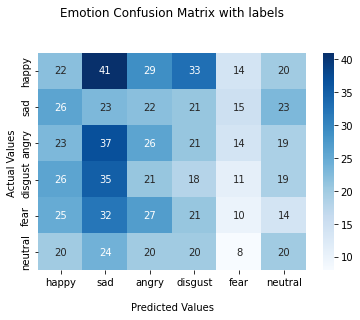

In [20]:
# Plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Emotion Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['happy', 'sad', 'angry', 'disgust', 'fear', 'neutral'])
ax.yaxis.set_ticklabels(['happy', 'sad', 'angry', 'disgust', 'fear', 'neutral'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [24]:
# Report useful metrics
ascore = sklearn.metrics.accuracy_score(Y[t_id:], y_pred)
rscore = sklearn.metrics.recall_score(Y[t_id:], y_pred, average='macro')
pscore = sklearn.metrics.precision_score(Y[t_id:], y_pred, average='macro')
fscore = sklearn.metrics.f1_score(Y[t_id:], y_pred, average='macro')
print('Accuracy:{}, Precision:{}, Recall:{}, F1:{}'.format(ascore, pscore, rscore, fscore))

Accuracy:0.14875, Precision:0.15019364658919107, Recall:0.14925908156491746, F1:0.14726171047861572


In [34]:
import tensorflow as tf

# Create a base model -- sequential, functional, or subclass.
model = tf.keras.Sequential([
    tf.keras.Input((nx, ny), name='feature'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

# # Wrap the model with adversarial regularization.
# adv_config = nsl.configs.make_adv_reg_config(multiplier=0.2, adv_step_size=0.05)
# adv_model = nsl.keras.AdversarialRegularization(model, adv_config=adv_config)

(x_train, y_train) = (X[:t_id, :, :], Y[:t_id])
# y_train = tf.keras.utils.to_categorical(y_train)
# print(y_train)

(x_test, y_test) = (X[t_id:, :, :], Y[t_id:])
# y_test = tf.keras.utils.to_categorical(y_test)

# Compile, train, and evaluate.
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=64, epochs=50)
model.evaluate(x_test, y_test)

Epoch 1/50
50/50 [==============================] - 6s 117ms/step - loss: 2121896960.0000 - accuracy: 0.2334
Epoch 2/50
50/50 [==============================] - 6s 115ms/step - loss: 586976896.0000 - accuracy: 0.4334
Epoch 3/50
50/50 [==============================] - 6s 117ms/step - loss: 330067040.0000 - accuracy: 0.5275
Epoch 4/50
50/50 [==============================] - 7s 137ms/step - loss: 236047456.0000 - accuracy: 0.5672
Epoch 5/50
50/50 [==============================] - 6s 116ms/step - loss: 232288112.0000 - accuracy: 0.6091
Epoch 6/50
50/50 [==============================] - 6s 117ms/step - loss: 187732208.0000 - accuracy: 0.6325
Epoch 7/50
50/50 [==============================] - 6s 115ms/step - loss: 125256264.0000 - accuracy: 0.6409
Epoch 8/50
50/50 [==============================] - 6s 116ms/step - loss: 127675536.0000 - accuracy: 0.6500
Epoch 9/50
50/50 [==============================] - 6s 115ms/step - loss: 126870720.0000 - accuracy: 0.6700
Epoch 10/50
50/50 [========

[6150443520.0, 0.22875000536441803]